In [3]:
import numpy as np
from matplotlib import pyplot as plt


def process_img_for_plot(img):
    # log处理
    imgScale = np.log10(img + 1e-30)
    # 获取实际的值
    imgValid = imgScale[img != 0]
    # 使图像分布在0-255
    p10 = np.percentile(imgValid, 10)
    m = 255 / (imgValid.max() - p10)
    b = -p10 * m
    # 去除最小值
    img = imgScale * m + b
    img[img < 0] = 0
    return img


# S_01224201    S_00170101  S_03280801  S_03289201 S_07639501   S_00183004 S_07639501 S_01389101
# S_01716901 NPLD
# S_00563101 SPLD
PRODUCT_ID = "S_00563101"
result_path = '../data/result/' + PRODUCT_ID + '/'

Text(0.5, 1.0, 'Simulated Area')

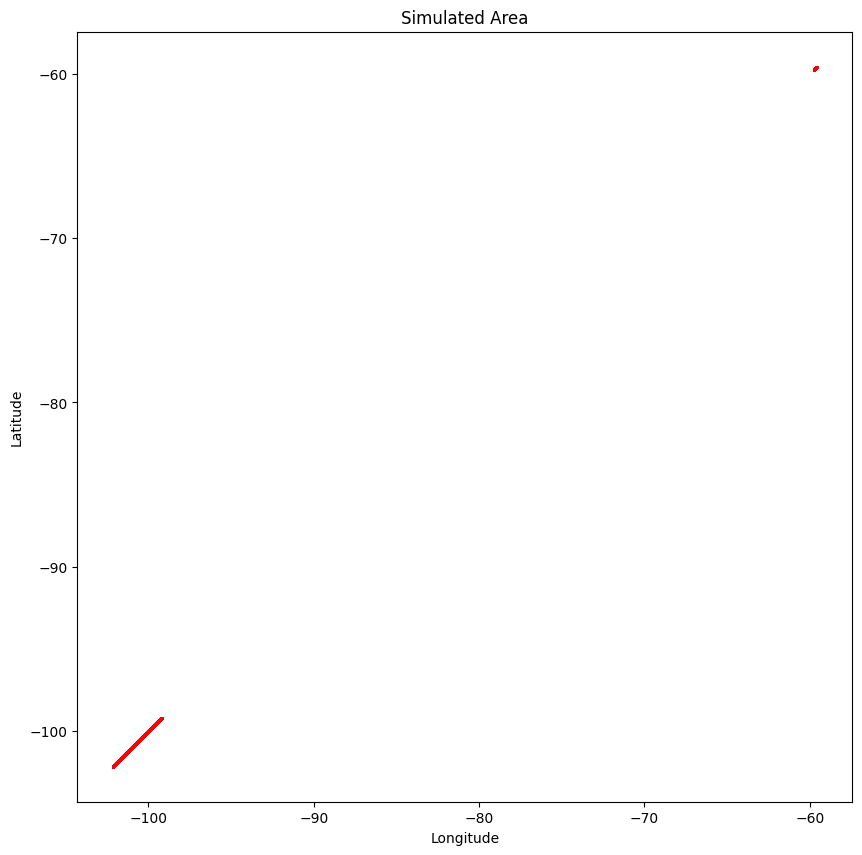

In [7]:
import matplotlib.patches as patches

sim_area_cartesian = np.load(result_path + 'sim_area_cartesian.npy')
sim_area_lonlat = np.load(result_path + 'sim_area_lonlat.npy')

# 画图sim_area_lonlat
plt.figure(figsize=(10, 10))
plt.scatter(sim_area_lonlat[0, :], sim_area_lonlat[1, :], s=1, c='r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Simulated Area')

In [ ]:
import matplotlib.patches as patches

sim_area_cartesian = np.load(result_path + 'sim_area_cartesian.npy')
point_count = sim_area_cartesian.shape[0]
rgram = np.load(result_path + 'rgram_data.npy')
rgram_vv = np.load(result_path + 'rgram_vv.npy')
radius = sim_area_cartesian.reshape(point_count * 3001 * 3, 3)
radius = np.linalg.norm(radius, axis=1) - 3396190
radius = radius.reshape(point_count, 3001, 3)
# 使用transpose将3001和3的维度交换位置
transposed_radius = radius.transpose(0, 2, 1)

# 使用reshape变为(point_count * 3) x 3001的形状
reshaped_radius = transposed_radius.reshape(point_count * 3, 3001)

plt.imshow(process_img_for_plot(rgram), cmap='gray')
# plt.axis('off')

# y轴方向上的相邻两个点之间的距离为0.0375微秒，沿y轴画一个条状表示15微秒的长度
y_scale = patches.Rectangle((100, 100), 50, 15 / 0.0375, linewidth=1, edgecolor='none', facecolor='w')
plt.gca().add_patch(y_scale)
plt.text(150, 200, '15μs', fontsize=8, verticalalignment='top', horizontalalignment='left', color='w')
# x轴方向上的相邻两个点之间的距离为400m，沿x轴画一个条状表示100Km的长度
x_scale = patches.Rectangle((100, 600), 100000 / 400, 50, linewidth=1, edgecolor='none', facecolor='w')
plt.gca().add_patch(x_scale)
plt.text(80, 680, '100Km', fontsize=8, verticalalignment='top', horizontalalignment='left', color='w')